In [41]:
from mlem.api import load
from mlem.runtime.client import HTTPClient
import numpy as np
from mlem.runtime.client import ExecutionError

client = HTTPClient(host="https://art-expert-igor2.fly.dev", port=None)

In [19]:
import requests
from requests.exceptions import ConnectionError

try:
    request = requests.get('https://art-expert-igor2.fly.dev/docs')
except ConnectionError:
    print('Web site does not exist')
else:
    print('Web site exists')

Web site exists


In [42]:
client

HTTPClient(interface_cache=InterfaceDescriptor(__root__={'predict': InterfaceMethod(name='predict', args=[InterfaceArgument(data_type=NumpyNdarrayType(value=None, shape=(None, 653, 4), dtype='float32'), serializer=PILImageSerializer(format='jpeg'), name='data', required=True, default=None)], returns=InterfaceDataType(data_type=DictType(value=None, item_types={'price': NumpyNumberType(value=None, dtype='float32')}), serializer=DictSerializer()))}), raw=False, host='https://art-expert-igor2.fly.dev', port=None)

In [43]:
from glob import glob

In [44]:
client

HTTPClient(interface_cache=InterfaceDescriptor(__root__={'predict': InterfaceMethod(name='predict', args=[InterfaceArgument(data_type=NumpyNdarrayType(value=None, shape=(None, 653, 4), dtype='float32'), serializer=PILImageSerializer(format='jpeg'), name='data', required=True, default=None)], returns=InterfaceDataType(data_type=DictType(value=None, item_types={'price': NumpyNumberType(value=None, dtype='float32')}), serializer=DictSerializer()))}), raw=False, host='https://art-expert-igor2.fly.dev', port=None)

In [45]:
import pandas as pd

test = pd.read_csv("../Downloads/archive/artDataset.csv")
test.price = test.price.map(lambda x: int(x[:-4].replace(".", "")))

In [46]:
test.head()

,Unnamed: 0,price,artist,title,yearCreation,signed,condition,period,movement
0,0,28500,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque
1,1,3000,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism
2,2,5000,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract
3,3,5000,Matthias Dornfeld,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract
4,4,2500,Alexis Marguerite Teplin,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract


In [64]:
client

HTTPClient(interface_cache=InterfaceDescriptor(__root__={'predict': InterfaceMethod(name='predict', args=[InterfaceArgument(data_type=NumpyNdarrayType(value=None, shape=(None, 653, 4), dtype='float32'), serializer=PILImageSerializer(format='jpeg'), name='data', required=True, default=None)], returns=InterfaceDataType(data_type=DictType(value=None, item_types={'price': NumpyNumberType(value=None, dtype='float32')}), serializer=DictSerializer()))}), raw=False, host='https://art-expert-igor2.fly.dev', port=None)

In [63]:
%%time

y_true = []
y_pred = []
broken = []

for i, row in test.head(3).iterrows():
    y_true.append(row.price)
    img_path = f"../Downloads/archive/artDataset/image_{i+1}.png"
    try:
        res = client.predict(img_path)
    except ExecutionError as e:
        y_pred.append(np.nan)
        print("E", end="")
        broken.append((e.msg, row))
    else:
        y_pred.append(res["price"])
        print(".", end="")

print()
for b in broken:
    print(b)

...
CPU times: user 51.2 ms, sys: 11.1 ms, total: 62.2 ms
Wall time: 14.6 s


In [65]:
y_pred

[1149.6782, 1094.5111, 1195.9369]

In [61]:
def rmsle(y_true, y_pred):
    return np.nanmean((np.log10(y_true) - np.log10(y_pred)) ** 2) ** 0.5

rmsle(y_true, y_pred)

0.8253749072068005

<Axes: ylabel='Frequency'>

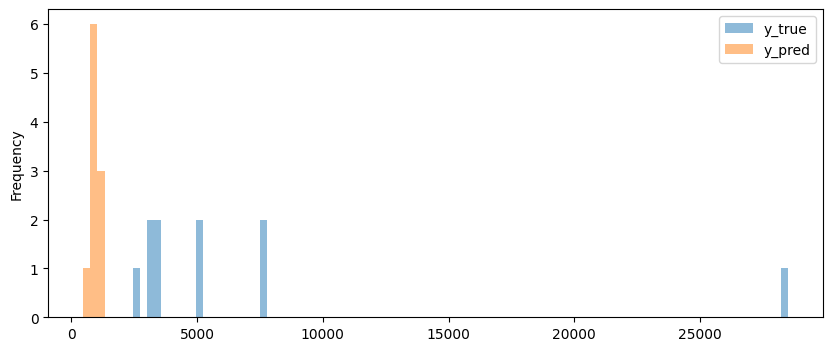

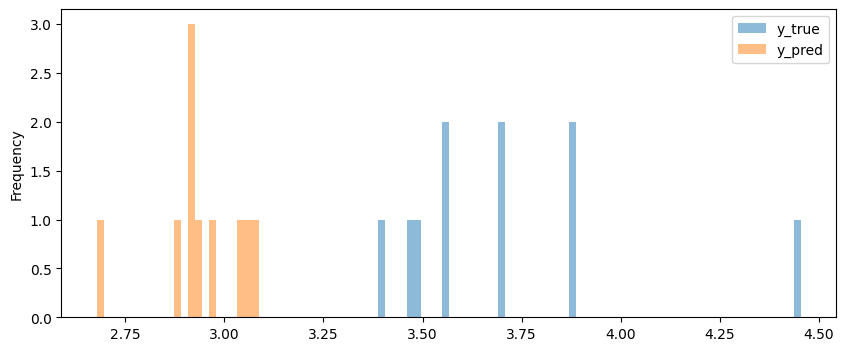

In [62]:
preds = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
kwargs = dict(kind="hist", bins=100, alpha=0.5, figsize=(10, 4))
preds.plot(**kwargs)
np.log10(preds).plot(**kwargs)